In [408]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from keras import *
import os
import random
import cv2
import warnings
warnings.filterwarnings('ignore')

#### Load data

In [330]:
def load_data(path,size = 150):
    data = []
    label = []
    for dirname in os.listdir(path):
        if dirname == 'NORMAL':
            for file in os.listdir(path + dirname):
                img = cv2.imread(path + dirname+'/'+ file)
                rescaled_image = cv2.resize(img,(size,size))
                data.append(rescaled_image)
                label.append('NORMAL')
        else:
            for file in os.listdir(path + dirname):
                img = cv2.imread(path + dirname+'/'+ file)
                rescaled_image = cv2.resize(img,(size,size))
                data.append(rescaled_image)
                label.append('PNEUMONIA')
    return data,label
                

In [331]:
training_data,training_label  = load_data('/kaggle/input/chest-xray-pneumonia/chest_xray/train/')
test_data,test_label  = load_data('/kaggle/input/chest-xray-pneumonia/chest_xray/test/')
val_data,val_label  = load_data('/kaggle/input/chest-xray-pneumonia/chest_xray/val/')

In [332]:
training_data = np.array(training_data)
training_label = np.array(training_label)

test_data = np.array(test_data)
test_label = np.array(test_label)

val_data = np.array(val_data)
val_label = np.array(val_label)

#### Data Visulaization

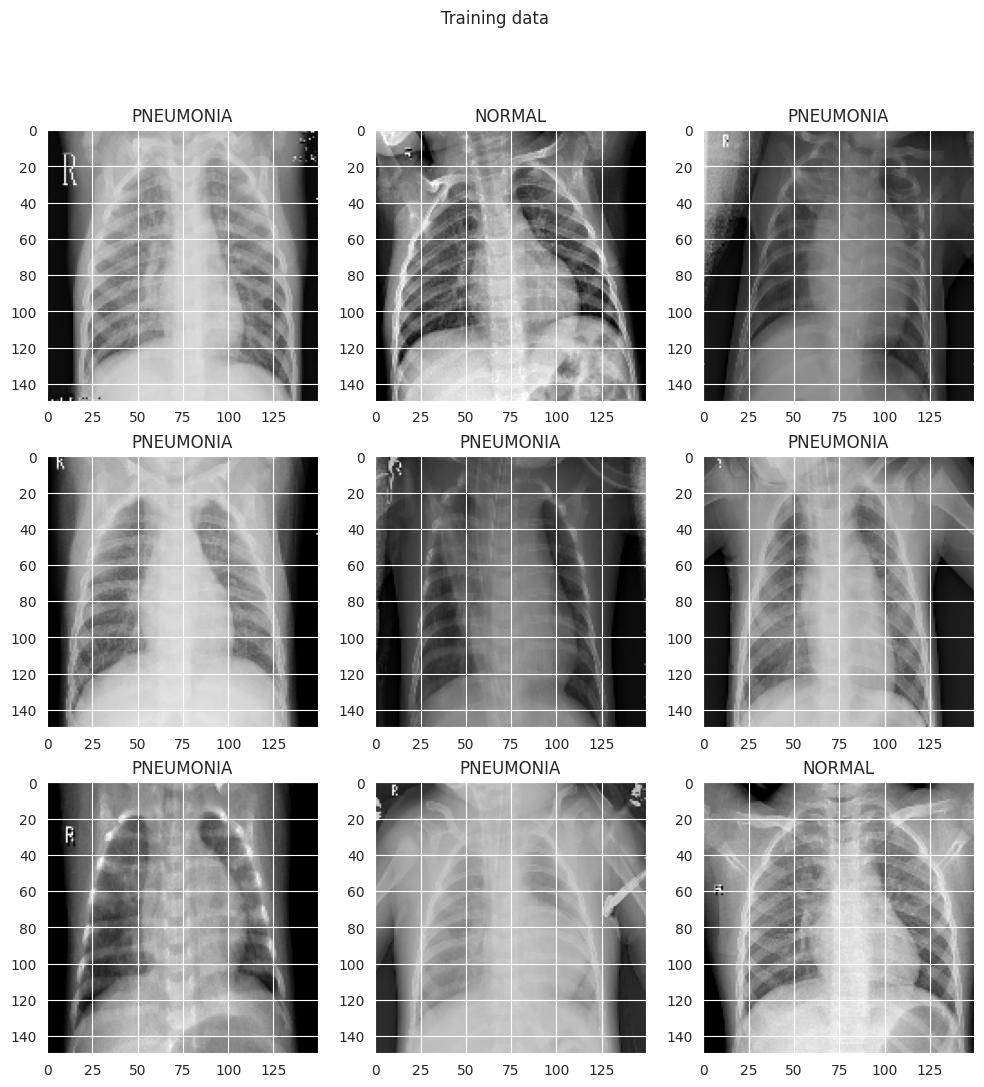

In [337]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Training data')
    random_index = random.randint(0,training_data.shape[0]-1)
    ax.imshow(training_data[random_index])
    ax.set_title(training_label[random_index])

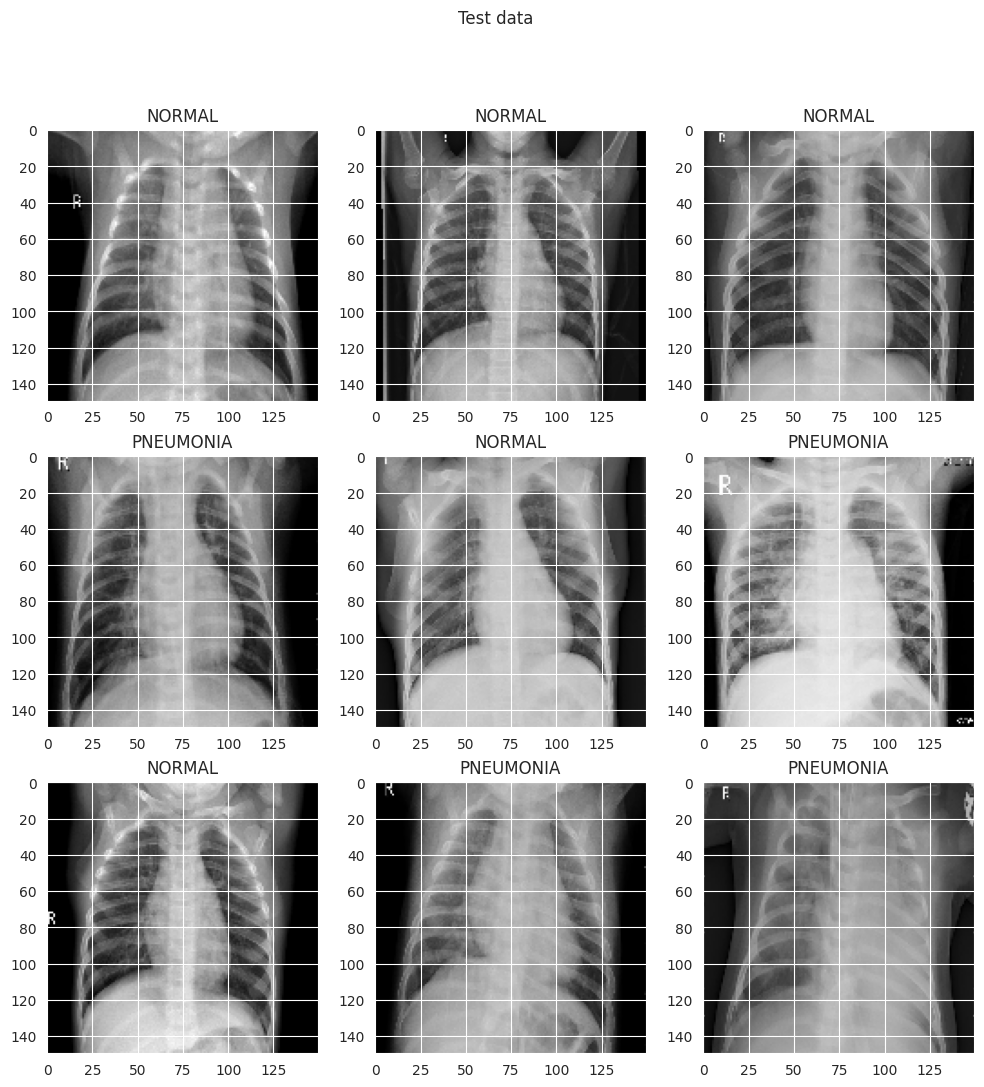

In [338]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Test data')
    random_index = random.randint(0,test_data.shape[0]-1)
    ax.imshow(test_data[random_index])
    ax.set_title(test_label[random_index])

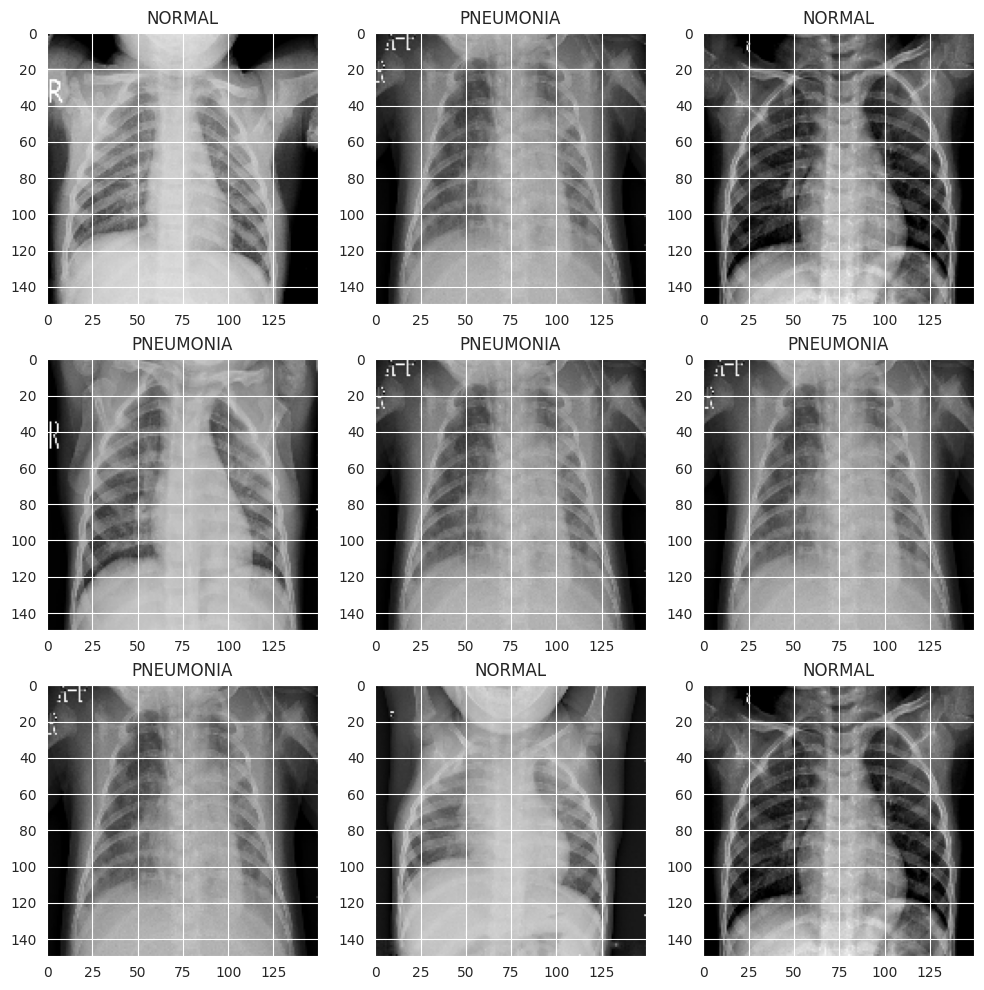

In [339]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.title('Validation data')
    random_index = random.randint(0,val_data.shape[0]-1)
    ax.imshow(val_data[random_index])
    ax.set_title(val_label[random_index])

#### Data Preprocessing

<Axes: ylabel='count'>

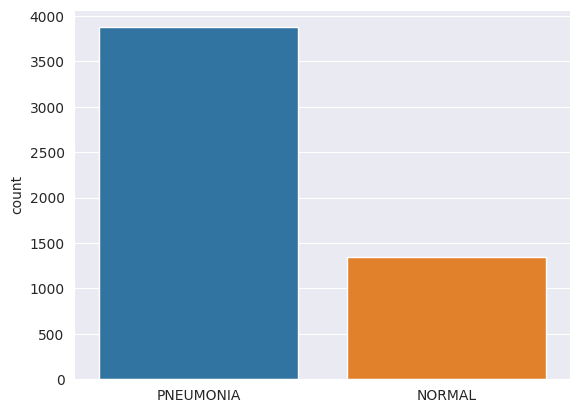

In [340]:
sns.set_style('darkgrid')
sns.countplot(x = training_label)

#### The data set is not balanced. We need to generate data to balance the dataset.
* Train a model with imbalanced data
* Train a model with balanced generated data and compare the results

#### Label encoding

In [392]:
training_encoder = LabelEncoder()

training_label_enocded = encoder.fit_transform(training_label)

In [393]:
val_encoder = LabelEncoder()

val_label_enocded = encoder.fit_transform(val_label)

In [394]:
test_encoder = LabelEncoder()

test_label_enocded = encoder.fit_transform(test_label)

### Model training with imbalanced Data

In [401]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(150,150,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [402]:
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
)

In [403]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │       8,640,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,656,769 (33.02 MB)

 Trainable params: 8,656,769 (33.02 MB)

 Non-trainable params: 0 (0.00 B)

In [404]:
model.fit(training_data, training_label_enocded, epochs = 5)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 23s 124ms/step - accuracy: 0.7467 - loss: 583.9760
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.8609 - loss: 163.8857
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.9240 - loss: 44.1377
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.9325 - loss: 27.4203
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 22s 135ms/step - accuracy: 0.9016 - loss: 33.3833


### Model Evaluation

In [405]:
model.evaluate(training_data, training_label_enocded)

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9301 - loss: 10.1987


[8.553302764892578, 0.941717803478241]

In [433]:
training_label_predicted  = model.predict(training_data)

163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


#### Classification Report

In [434]:
print(classification_report(training_label_enocded,training_label_predicted.astype(int)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1341
           1       0.99      0.92      0.96      3875

    accuracy                           0.94      5216
   macro avg       0.90      0.95      0.92      5216
weighted avg       0.95      0.94      0.94      5216



#### Data Visualization

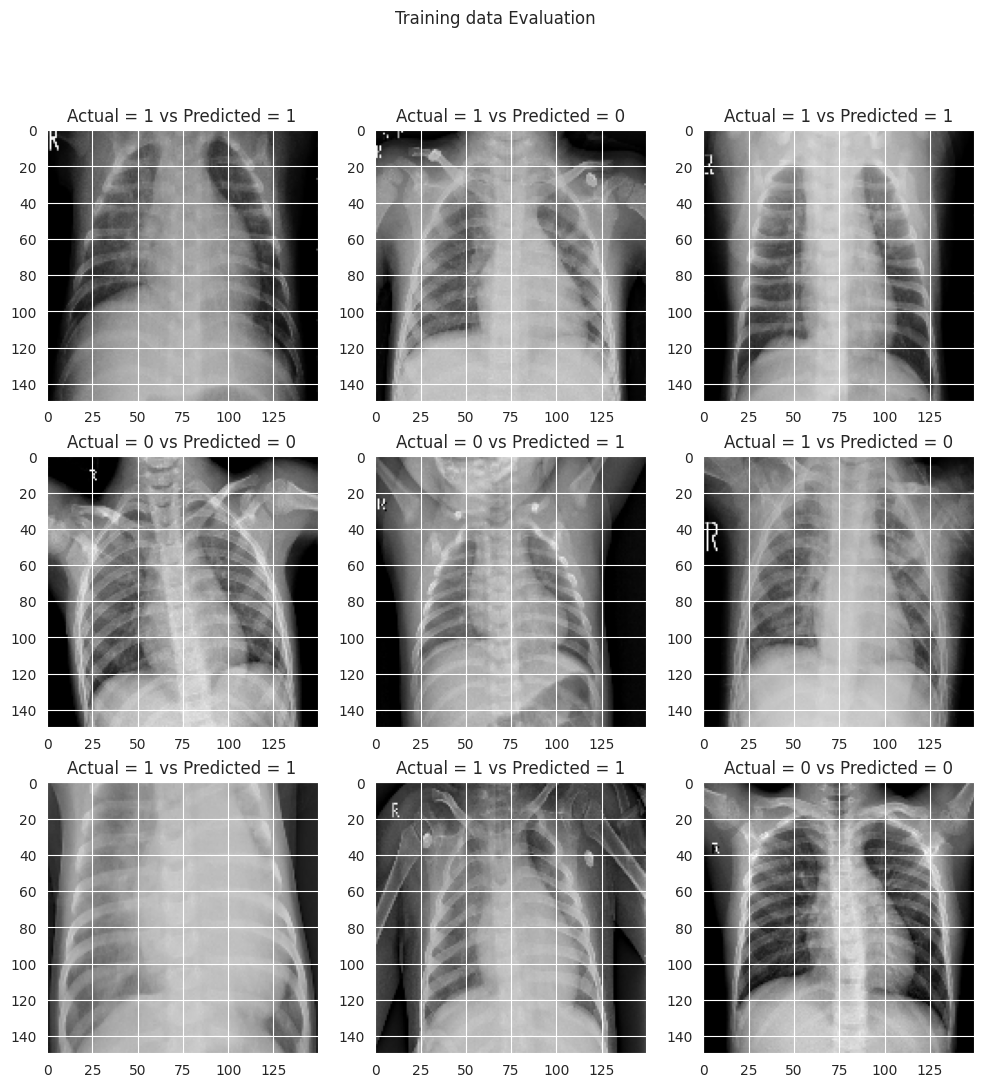

In [443]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Training data Evaluation')
    random_index = random.randint(0,training_data.shape[0]-1)
    ax.imshow(training_data[random_index])
    ax.set_title(f'Actual = {training_label_enocded[random_index]} vs Predicted = {training_label_predicted.reshape(-1).astype(int)[random_index]}')

#### Heatmap (confusion matrix)

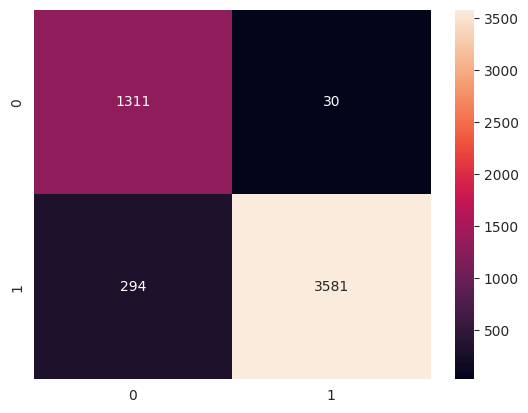

In [458]:
sns.heatmap(confusion_matrix(training_label_enocded,training_label_predicted.astype(int)), annot = True , fmt = '.0f')
plt.show()

### Model Validation

In [459]:
model.evaluate(val_data, val_label_enocded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9375 - loss: 6.3996


[6.399617671966553, 0.9375]

In [460]:
val_label_predicted  = model.predict(val_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [461]:
print(classification_report(val_label_enocded,val_label_predicted.astype(int)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



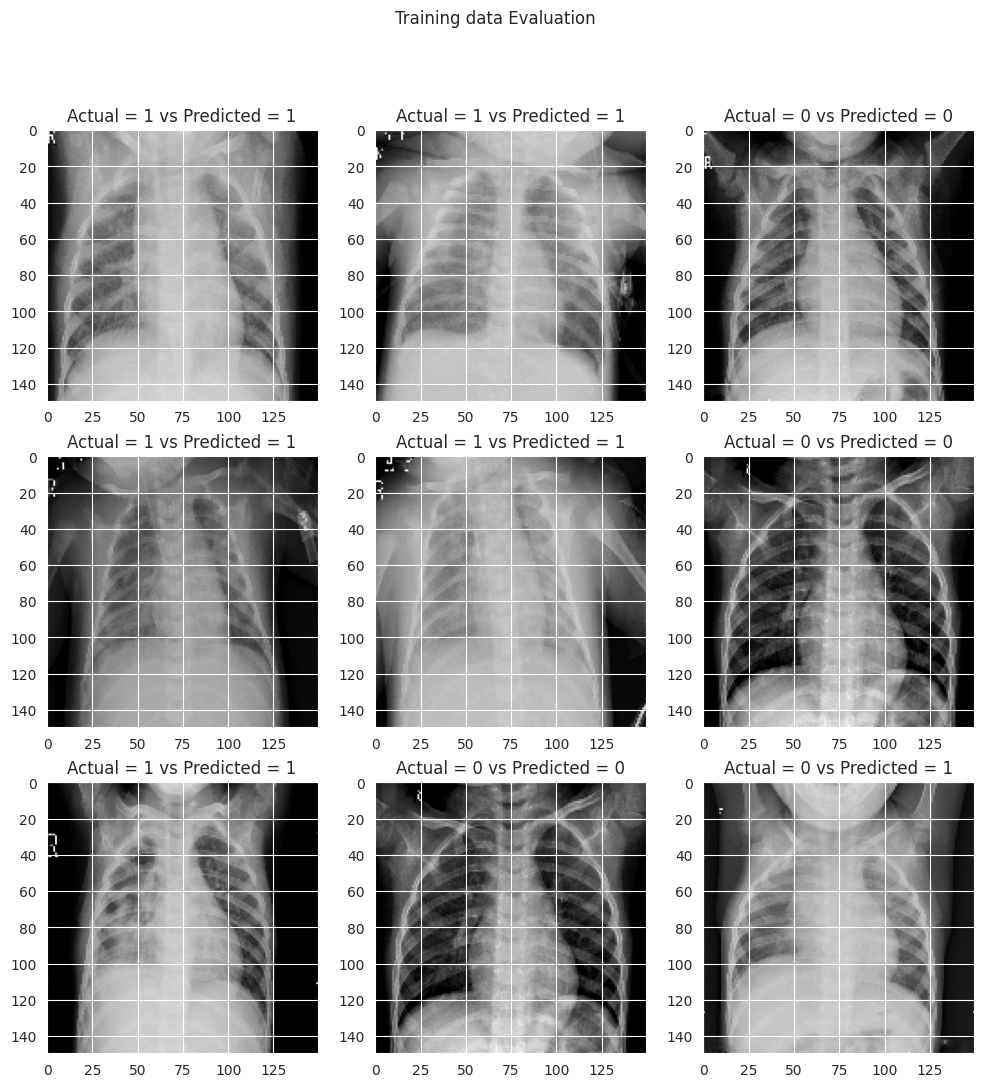

In [463]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Training data Evaluation')
    random_index = random.randint(0,val_data.shape[0]-1)
    ax.imshow(val_data[random_index])
    ax.set_title(f'Actual = {val_label_enocded[random_index]} vs Predicted = {val_label_predicted.reshape(-1).astype(int)[random_index]}')

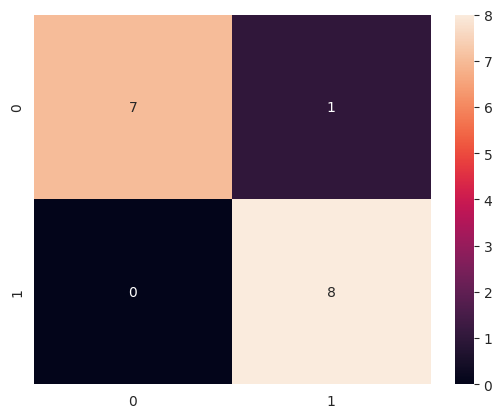

In [464]:
sns.heatmap(confusion_matrix(val_label_enocded,val_label_predicted.astype(int)), annot = True , fmt = '.0f')
plt.show()

### Model Testing

In [465]:
model.evaluate(test_data, test_label_enocded)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8852 - loss: 15.7342


[38.91960144042969, 0.7900640964508057]

In [469]:
test_label_predicted  = model.predict(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [470]:
print(classification_report(test_label_enocded,test_label_predicted.astype(int)))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68       234
           1       0.78      0.94      0.85       390

    accuracy                           0.80       624
   macro avg       0.81      0.75      0.77       624
weighted avg       0.81      0.80      0.79       624



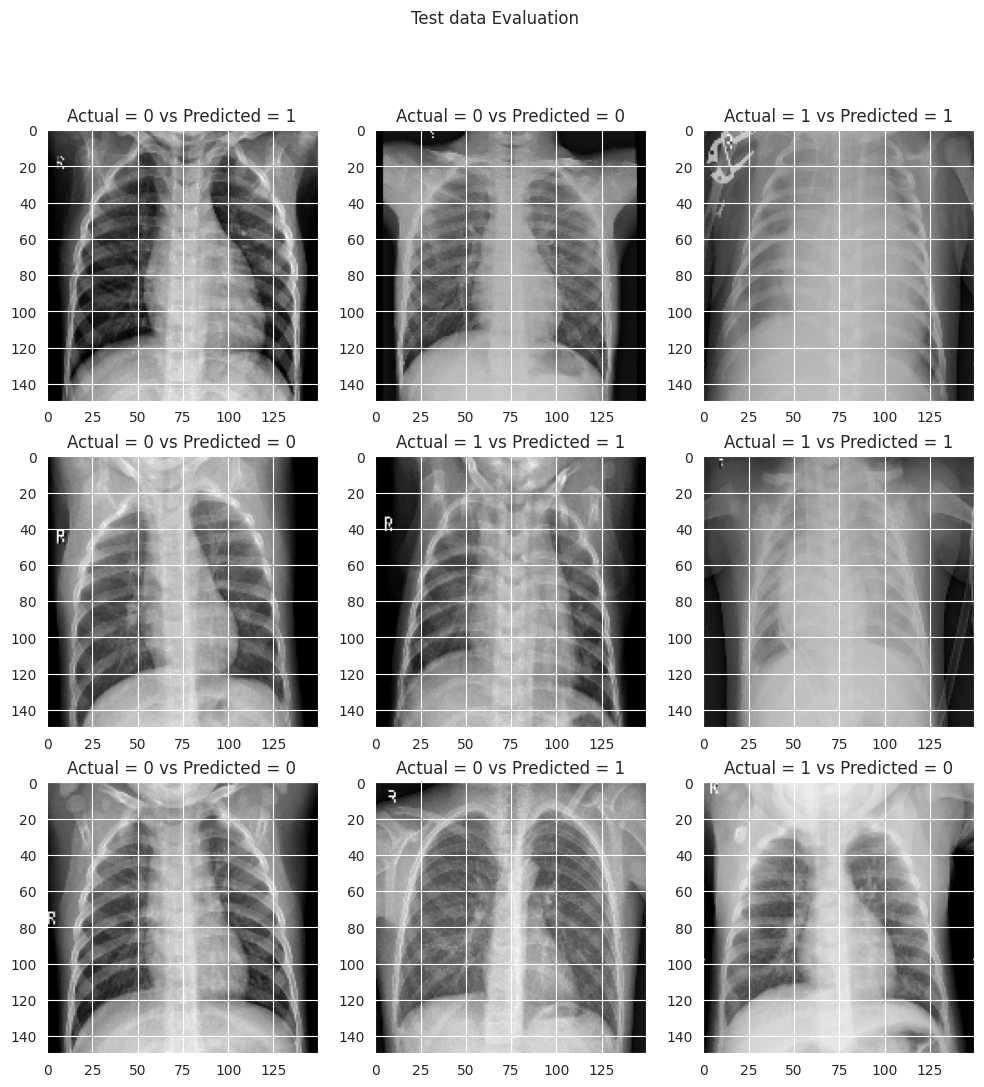

In [471]:
_,axs = plt.subplots(3,3, figsize = (12,12))

for ax in axs.flatten():
    plt.suptitle('Test data Evaluation')
    random_index = random.randint(0,test_data.shape[0]-1)
    ax.imshow(test_data[random_index])
    ax.set_title(f'Actual = {test_label_enocded[random_index]} vs Predicted = {test_label_predicted.reshape(-1).astype(int)[random_index]}')

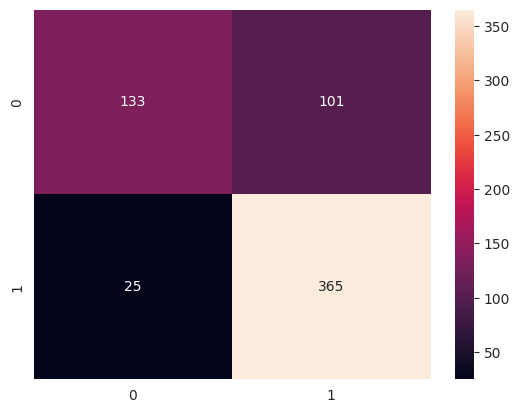

In [472]:
sns.heatmap(confusion_matrix(test_label_enocded,test_label_predicted.astype(int)), annot = True , fmt = '.0f')
plt.show()